In [13]:
import missingno.missingno as msno

In [14]:
msno.geoplot

<function missingno.missingno.geoplot>

In [15]:
import pandas as pd
collisions = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv")

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
def m(v):
    if pd.notnull(v):
        return eval(v)
    else:
        return (None, None)
collisions['LOCATION'] = collisions['LOCATION'].map(m)

In [18]:
%matplotlib inline

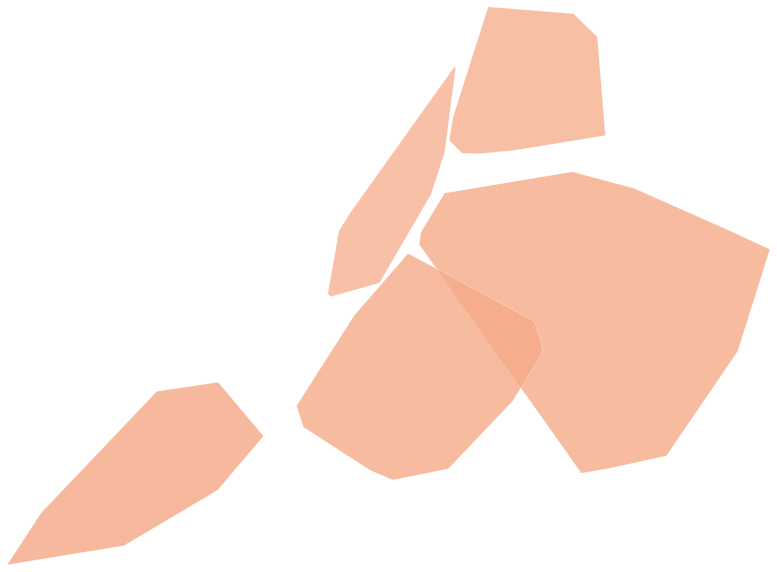

In [10]:
msno.geoplot(collisions.sample(1000), x='LONGITUDE', y='LATITUDE', by='BOROUGH')

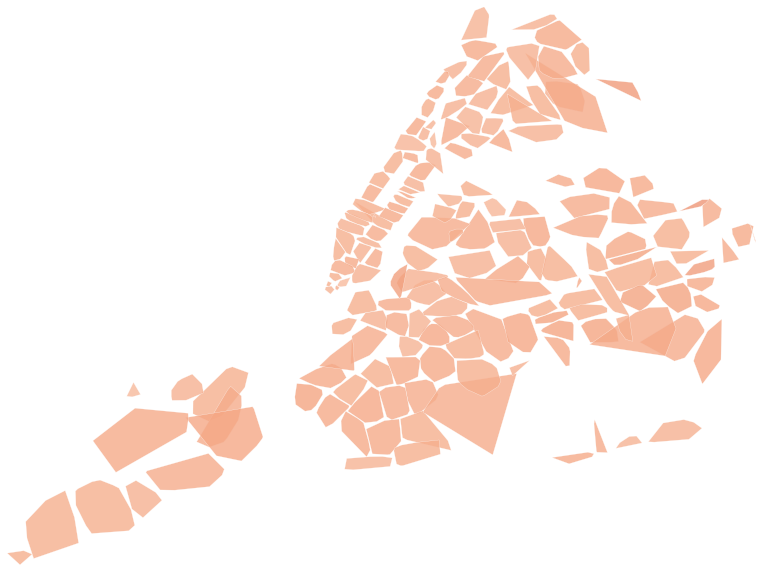

In [44]:
msno.geoplot(collisions.sample(10000), x='LONGITUDE', y='LATITUDE', by='ZIP CODE')

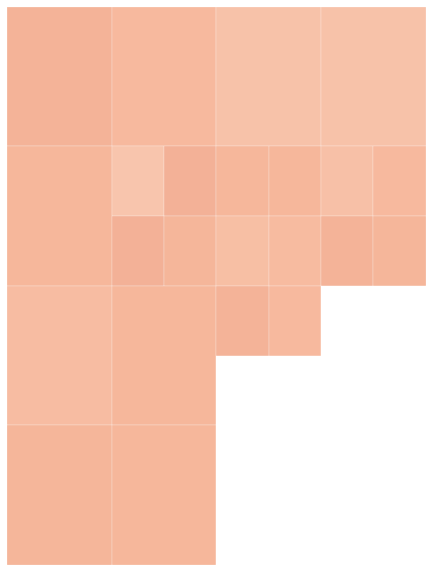

In [46]:
import mplleaflet
msno.geoplot(collisions.sample(1000), coordinates='LOCATION')

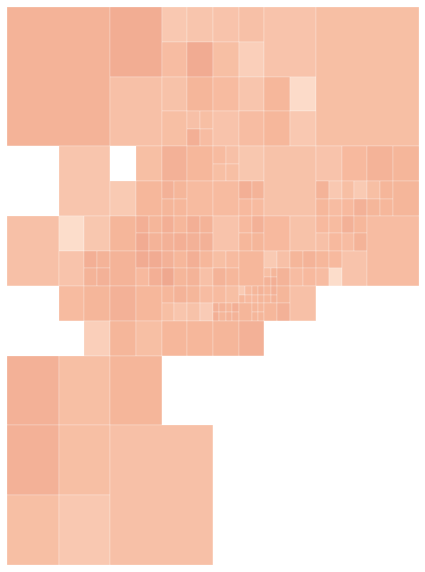

CPU times: user 1min 4s, sys: 394 ms, total: 1min 5s
Wall time: 1min 5s


In [36]:
%time msno.geoplot(collisions.sample(10000), coordinates='LOCATION')

In [2]:
import geopandas as gpd

In [3]:
boroughs = gpd.read_file("boroughs.geojson", driver='GeoJSON')

In [7]:
boroughs['BoroName'] = [n.upper() for n in boroughs['BoroName']]

In [11]:
geom = boroughs.set_index('BoroName')['geometry']

In [23]:
import shapely

In [25]:
type(geom['STATEN ISLAND'])

shapely.geometry.multipolygon.MultiPolygon

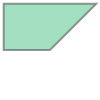

In [35]:
shapely.ops.cascaded_union([shapely.geometry.Polygon([[0,0],[0,1],[2,1],[1,0]]),
                            shapely.geometry.Polygon([[1,1],[2,1],[2,2],[2,1]])])

In [36]:
s = _

In [37]:
s.type

'Polygon'

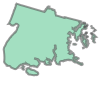

In [42]:
shapely.ops.cascaded_union(p)

In [44]:
geom

BoroName
STATEN ISLAND    (POLYGON ((-74.05050806403247 40.5664220341608...
QUEENS           (POLYGON ((-73.83668274106708 40.5949466970158...
BROOKLYN         (POLYGON ((-73.8670614947212 40.58208797679338...
MANHATTAN        (POLYGON ((-74.01092841268033 40.6844914725429...
BRONX            (POLYGON ((-73.89680883223775 40.7958084451597...
Name: geometry, dtype: object

BRONX
BROOKLYN
MANHATTAN
QUEENS
STATEN ISLAND


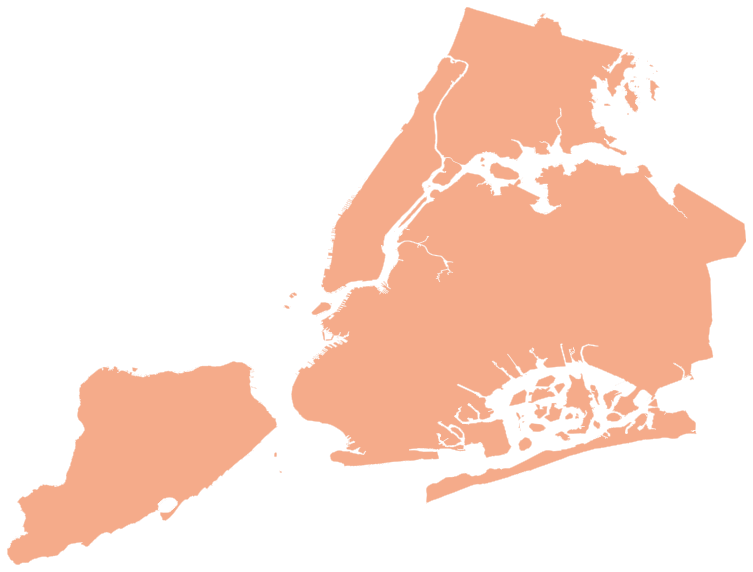

In [48]:
msno.geoplot(collisions.sample(1000), x='LONGITUDE', y='LATITUDE', by='BOROUGH', geometry=geom)

In [ ]:
# %time msno.geoplot(collisions.sample(100000), coordinates='LOCATION')